<div id="question-area">
				<article class="post">
					<h2>Conversion fraud in Digital Advertising <!-- <small>(100 Marks)</small> --></h2> 
					<div class="content-block-extra">
						<p></p><div>Digital Advertising is changing at a rapid pace with a huge increase in digital audience. At the same time, the digital advertising success metric is shifting from audience volume (eg. Impression count) to conversions (eg. lead submissions) as the success metric. This requires higher transparency and control on the conversions.</div><div><br></div><div>Colombia, the digital advertising arm of Times Internet Limited has seen significant growth in its digital advertising inventory. It wants to ensure that in all its conversion-based campaigns, no unfair advantage is given to the publishers generating fake leads. </div><div><br></div><div><b>Your task is to segregate the test data between genuine and false conversions by identifying the maximum possible leads generated by the malignant technique.</b></div><div><br></div><div><b><u>Note- </u></b></div><div>Joining with Click log: </div><div><div>imprId (Click Log) and imprid_cr (Conversion Log - Test and Train Data)</div><div><br></div><div>(Use click log data for additional data required for identifying conversion fraud)</div><div><br></div><div><b>Essential Columns</b></div><div><ul><li>client id: Advertiser ID</li><li>pubclient id: Publisher ID</li><li>clickIp: IP Address</li><li>clmbuser id : unique user id</li><li>impr id: Unique Key for every served impression</li><li>site id: Publisher wesite</li><li>goal id: Conversion`s goal type identification id</li><li>City id / State id / CountryDim id: Geo Details</li><li>browser id: browser used for accessing publisher on any device on web.</li><li>adslot id: slot id where advertisement is displayed on any site (unqiue for all sites)</li><li>crtd: timestamp of the action</li><li>itmclmb id: Image/Creative shown</li><li>ispDimId: Internet Service Provider</li><li>devTypeDimId: Device Id</li><li>osVerDimId: OS Version</li></ul></div></div><div></div><div></div><p></p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2 = pd.read_csv('click_log.csv')
df2.head()

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22,24,25,26,29,30,31,32,33,34,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,imprId,clmbUserId,adSltDimId,auds,allAuds,itemid,algo,advClientId,pubClientId,...,devTypeDimId,vendorDimId,modelDimId,connTypeDimId,browserDimId,refClusterId,fraud,cpa,imprUserId,optout
0,0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN
1,0,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
2,0,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
3,0,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
4,0,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN


In [3]:
traindata = pd.read_csv('Training Data.csv')
traindata.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [4]:
col_list = list(df2.columns)
col_list = col_list[1:]

In [5]:
cols = traindata.columns
print(len(cols))

56


In [6]:
ans = []
column_list = list(traindata.columns)
for i in range(len(column_list)-1):
    ans.append(column_list[i].split('_')[0])

ans.append(column_list[-1])
traindata.columns = ans
print(ans,len(ans))

['clientid', 'clmbuserid', 'conversiontime', 'imprid', 'adslotdimid', 'algo', 'audiences', 'clickbid', 'geodimid', 'ip', 'itemcolumbiaid', 'itemid', 'position', 'pubclientid', 'refurl', 'siteId', 'templateid', 'goalid', 'time', 'adLogType', 'v', 'allAudiences', 'pricingtype', 'osId', 'browserId', 'cityId', 'stateId', 'modelDimId', 'lookUpFrom', 'connTypeDimId', 'ispDimId', 'countryDimId', 'goalTypeId', 'conversionDurationInMillis', 'impressionTimeInMillis', 'clickTimeInMillis', 'osVerDimId', 'uuidSource', 'geoGrpDimId', 'stateGrpDimId', 'deviceId', 'uvh', 'uv', 'platformId', 'sdkVersion', 'usrClusterId', 'cityGrpDimId', 'siteClusterIds', 'refClusterId', 'paid', 'spend', 'attributionType', 'conversionid', 'optimize', 'bundleId', 'conversion_fraud'] 56


In [7]:
traindata.head(2)

,clientid,clmbuserid,conversiontime,imprid,adslotdimid,algo,audiences,clickbid,geodimid,ip,...,cityGrpDimId,siteClusterIds,refClusterId,paid,spend,attributionType,conversionid,optimize,bundleId,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [8]:
toselect1 = ['clientid','pubclientid','clmbuserid','imprid','siteId','goalid','cityId','stateId','countryDimId',
           'browserId','adslotdimid','ispDimId','osVerDimId']
toselect2 = ['clickIp','crtd','itmClmbLId','devTypeDimId']
toselect = sorted(toselect1+toselect2)
print(toselect)

['adslotdimid', 'browserId', 'cityId', 'clickIp', 'clientid', 'clmbuserid', 'countryDimId', 'crtd', 'devTypeDimId', 'goalid', 'imprid', 'ispDimId', 'itmClmbLId', 'osVerDimId', 'pubclientid', 'siteId', 'stateId']


In [9]:
df = traindata[['clientid','pubclientid','clmbuserid','imprid','siteId','goalid','cityId','stateId','countryDimId',
           'browserId','adslotdimid','ispDimId','osVerDimId','conversion_fraud']]
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True
2,75694,2320,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True
3,75694,2320,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True
4,30431,1,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True


In [10]:
df2.shape,traindata.shape

((244864, 55), (965, 56))

In [11]:
# traindata['clickip'] = np.array(list(df2['clickIp'].values)[:traindata.shape[0]])
# traindata['crtd'] = np.array(list(df2['crtd'].values)[:traindata.shape[0]])
# traindata['itm']
for i in toselect2:
    df[i] = np.array(list(df2[i].values)[:traindata.shape[0]])

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,103.212.158.109,1.620000e+12,5618155,196047.0
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,2409:4055:2e87:42e9:4dec:ae38:609e:8932,1.620000e+12,5617956,196047.0
2,75694,2320,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,2405:201:c00e:4087:5838:cbcb:8571:e8c0,1.620000e+12,5617956,196047.0
3,75694,2320,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,106.213.27.57,1.620000e+12,5617956,196047.0
4,30431,1,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,103.48.46.23,1.620000e+12,5617956,196047.0


In [13]:
temp = pd.DataFrame(df.groupby(['clientid']))
temp.shape

(57, 2)

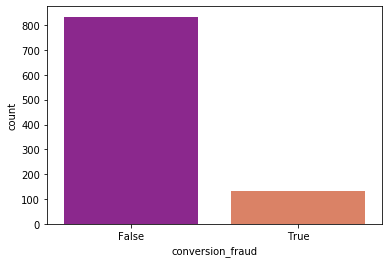

In [14]:
sn.countplot(df['conversion_fraud'],palette='plasma')

In [15]:
df.isnull().sum()

clientid             0
pubclientid          0
clmbuserid           0
imprid               0
siteId               0
goalid               0
cityId              20
stateId             20
countryDimId        20
browserId           21
adslotdimid          0
ispDimId            20
osVerDimId          21
conversion_fraud     0
clickIp              0
crtd                 0
itmClmbLId           0
devTypeDimId         0
dtype: int64

In [16]:
temp = df.copy()
a = df['countryDimId'].mean()
print(a)

147.1037037037037


In [17]:
list(df['countryDimId'].values)[:10]

[144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 145.0, 144.0]

## Handling Null Values

In [18]:
tofill = ['cityId','stateId','countryDimId','browserId','ispDimId','osVerDimId']

In [19]:
def fillnavalues(colname):
    df[colname+'_mean'] = df[colname].fillna(df[colname].mean())
    df[colname+'_median'] = df[colname].fillna(df[colname].median())
    df[colname+'_mode'] = df[colname].fillna(df[colname].mode()[0])

In [21]:
for i in tofill:
    fillnavalues(i)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

 Distribution plots for : cityId is shown ↓


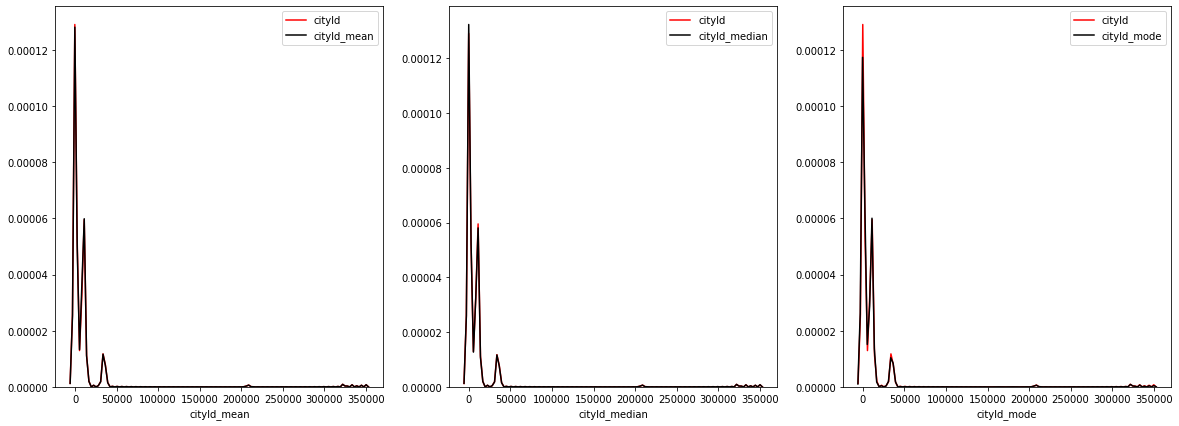

 Distribution plots for : stateId is shown ↓


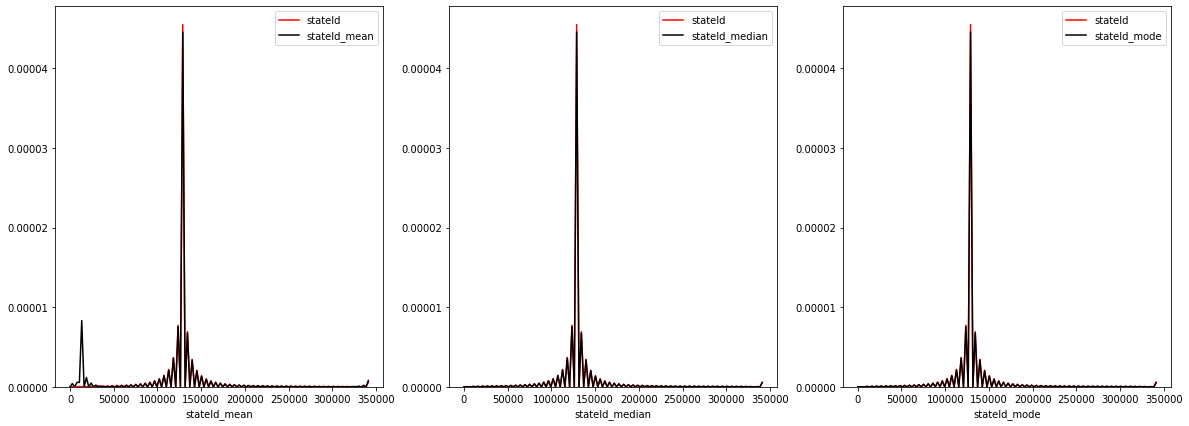

 Distribution plots for : countryDimId is shown ↓


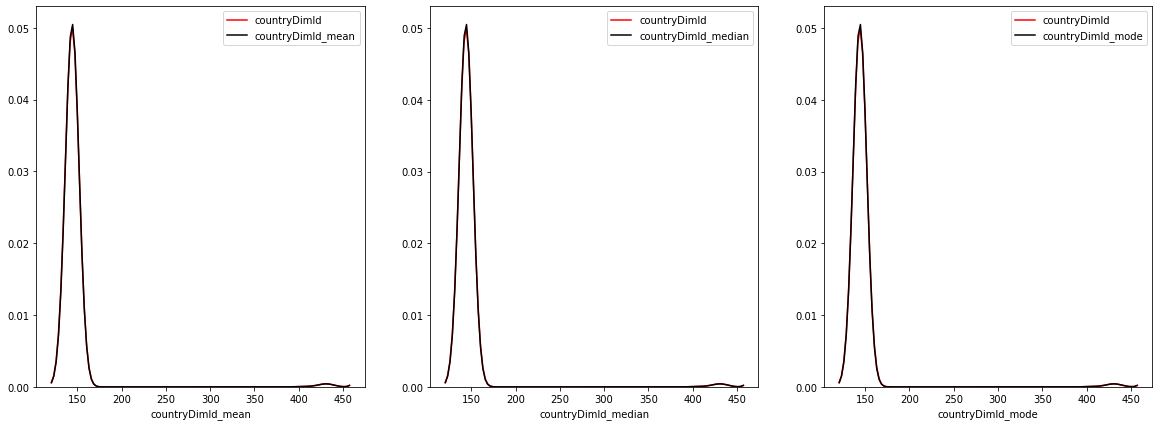

 Distribution plots for : browserId is shown ↓


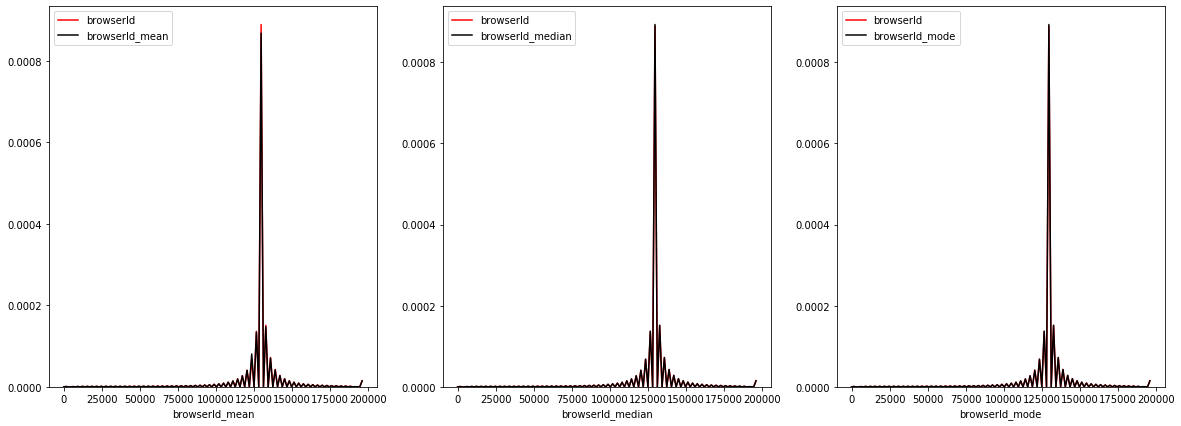

 Distribution plots for : ispDimId is shown ↓


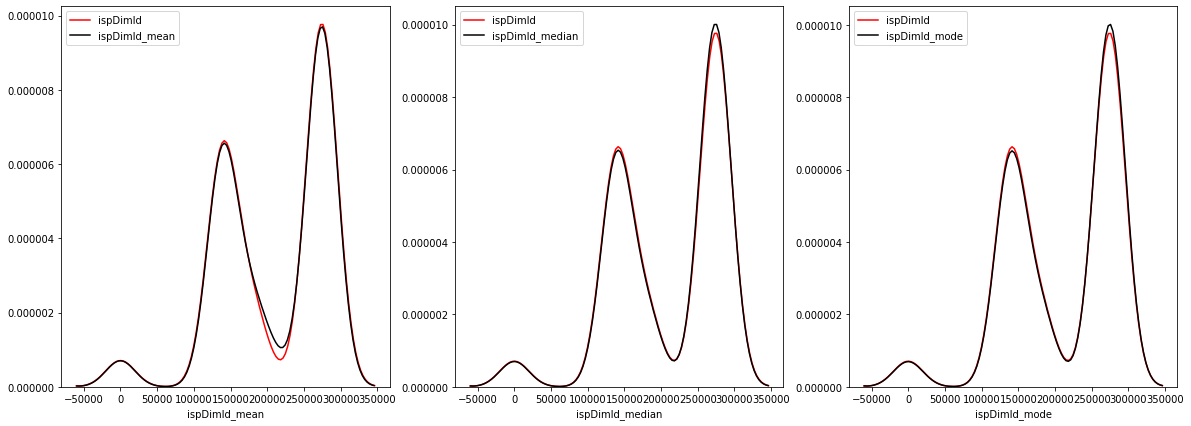

 Distribution plots for : osVerDimId is shown ↓


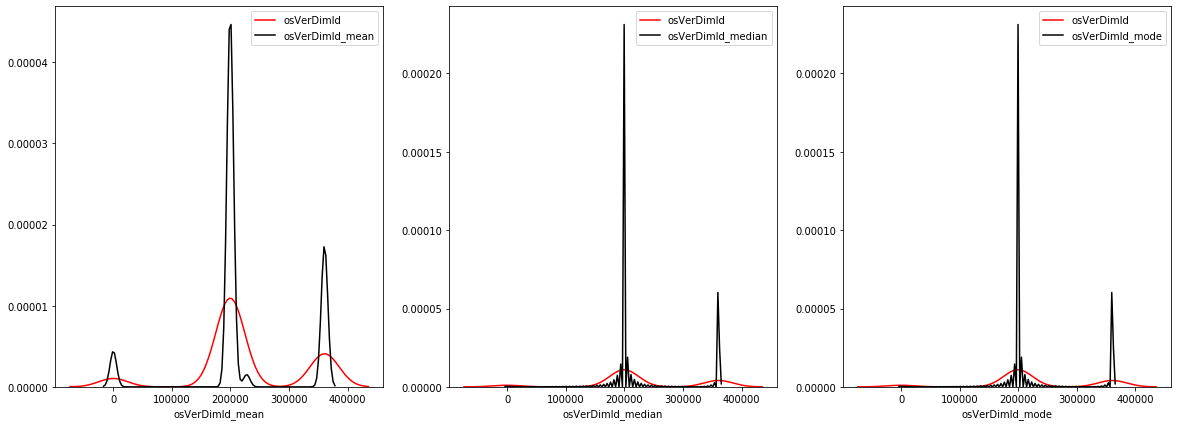

In [22]:
def plots(col):
    
    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)   
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mean'],kde=True,hist=False,color='black',label=col+'_mean')
    
    plt.subplot(1,3,2)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_median'],kde=True,hist=False,color='black',label=col+'_median')
    
    plt.subplot(1,3,3)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mode'],kde=True,hist=False,color='black',label=col+'_mode')
    
    plt.show()
    
 
tofill = ['cityId','stateId','countryDimId','browserId','ispDimId','osVerDimId']
for i in tofill:
    print(f' Distribution plots for : {i} is shown ↓')      
    plots(i)
    print("="*125)
    
    

In [23]:
#tofill = ['cityId':'mean','stateId':'mean','countryDimId':'mean','browserId':'median','ispDimId:median','osVerDimId:ignore']
print(list(df.columns))

['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'goalid', 'cityId', 'stateId', 'countryDimId', 'browserId', 'adslotdimid', 'ispDimId', 'osVerDimId', 'conversion_fraud', 'clickIp', 'crtd', 'itmClmbLId', 'devTypeDimId', 'cityId_mean', 'cityId_median', 'cityId_mode', 'stateId_mean', 'stateId_median', 'stateId_mode', 'countryDimId_mean', 'countryDimId_median', 'countryDimId_mode', 'browserId_mean', 'browserId_median', 'browserId_mode', 'ispDimId_mean', 'ispDimId_median', 'ispDimId_mode', 'osVerDimId_mean', 'osVerDimId_median', 'osVerDimId_mode']


In [24]:
df = df[['clientid', 'pubclientid', 'clmbuserid', 'imprid', 
         'siteId', 'goalid', 'cityId_mean', 'stateId_mean', 'countryDimId_mean', 'browserId_median', 'adslotdimid', 
         'ispDimId_median', 'osVerDimId', 'conversion_fraud', 'clickIp', 'crtd', 'itmClmbLId', 'devTypeDimId']]

df.columns = ['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'goalid', 'cityId', 
              'stateId', 'countryDimId', 'browserId', 'adslotdimid', 
              'ispDimId', 'osVerDimId', 'conversion_fraud', 'clickIp', 'crtd', 'itmClmbLId', 'devTypeDimId']
df.head(2)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,103.212.158.109,1.620000e+12,5618155,196047.0
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,2409:4055:2e87:42e9:4dec:ae38:609e:8932,1.620000e+12,5617956,196047.0


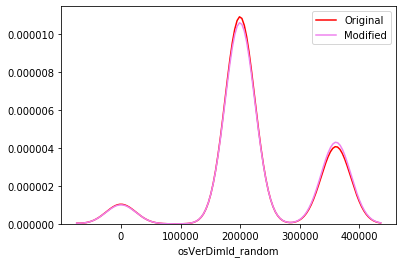

In [25]:
temp = df.copy()
maxi = max(df['osVerDimId'])-min(df['osVerDimId'])
meanval = df['osVerDimId'].mean()
finalval = meanval/maxi
temp['osVerDimId_random'] = temp['osVerDimId'].fillna(maxi)
sn.distplot(temp['osVerDimId'],kde=True,hist=False,color='red',label='Original')
sn.distplot(temp['osVerDimId_random'],kde=True,hist=False,color='violet',label='Modified')
plt.legend()
plt.show()


For 'osVerDimId' col the max value was the best value to fill in !

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


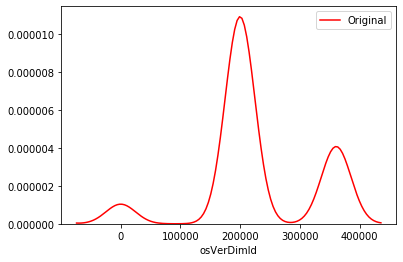

In [26]:
df['osVerDimId'] = df['osVerDimId'].fillna(maxi)
sn.distplot(temp['osVerDimId'],kde=True,hist=False,color='red',label='Original')
plt.show()

In [27]:
df.isnull().sum()

clientid            0
pubclientid         0
clmbuserid          0
imprid              0
siteId              0
goalid              0
cityId              0
stateId             0
countryDimId        0
browserId           0
adslotdimid         0
ispDimId            0
osVerDimId          0
conversion_fraud    0
clickIp             0
crtd                0
itmClmbLId          0
devTypeDimId        0
dtype: int64

In [28]:
df.head(3)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,103.212.158.109,1.620000e+12,5618155,196047.0
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,2409:4055:2e87:42e9:4dec:ae38:609e:8932,1.620000e+12,5617956,196047.0
2,75694,2320,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,2405:201:c00e:4087:5838:cbcb:8571:e8c0,1.620000e+12,5617956,196047.0


In [29]:
maps = list(df['clickIp'].values)
mapper = dict(zip(maps,map(maps.count,maps)))
mapper = dict(sorted(mapper.items(),key=lambda x:x[1],reverse=True))
df['clickIp'] = df['clickIp'].map(mapper)
df.head()

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,1.620000e+12,5618155,196047.0
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
2,75694,2320,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,1.620000e+12,5617956,196047.0
3,75694,2320,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
4,30431,1,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,1.620000e+12,5617956,196047.0


In [30]:
def getmap(col):
    
    maps = list(df[col].values)
    mapper = dict(zip(maps,map(maps.count,maps)))
    df[col] = df[col].map(mapper)
    
    
catcol = ['clmbuserid','imprid']
for i in catcol:
    getmap(i)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,75694,2320,1,1,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,1.620000e+12,5618155,196047.0
1,75694,15240,2,2,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
2,75694,2320,1,1,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,1.620000e+12,5617956,196047.0
3,75694,2320,1,1,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
4,30431,1,10,1,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,1.620000e+12,5617956,196047.0


In [32]:
print(list(df['pubclientid'].unique()))

[2320, 15240, 1, 2308, 2658, 85030, 2501, 65615, 2310, 16018, 16892, 7268, 82030, 16153, 13540, 13539, 8359, 16951, 77853, 15336, 76969, 12755, 65594, 16505, 16211, 38513, 83084, 16258, 76972, 70348, 2848, 2659, 14292, 67641, 82008, 35273, 81975, 2316, 8358, 76339, 8357, 82562]


In [33]:
print(list(df['clmbuserid'].unique()))

[1, 2, 10, 3, 20]


In [34]:
print(list(df['clientid'].unique()))

[75694, 30431, 82122, 77339, 86530, 1465, 7750, 802, 78510, 85572, 86321, 66066, 32847, 7063, 25470, 77713, 67368, 86495, 29892, 2139, 31365, 3180, 8895, 83515, 64588, 84618, 86431, 43386, 24075, 66839, 70668, 77616, 67615, 26329, 85524, 77274, 51483, 78614, 69398, 70900, 11451, 12510, 43051, 28602, 85774, 76280, 64731, 85007, 2380, 16664, 35702, 17232, 2060, 86555, 70491, 77538, 1518]


In [35]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [36]:
def labelencode(col):
    df[col] = lr.fit_transform(df[col])

In [37]:
col_list = ['clmbuserid','clientid','pubclientid','imprid']
for i in col_list:
    labelencode(i)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,1.620000e+12,5618155,196047.0
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,1.620000e+12,5617956,196047.0
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,1.620000e+12,5617956,196047.0
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,1.620000e+12,5617956,196047.0


In [39]:
numeric_cols = [i for i in list(df.columns) if i not in col_list]
print(numeric_cols)

['siteId', 'goalid', 'cityId', 'stateId', 'countryDimId', 'browserId', 'adslotdimid', 'ispDimId', 'osVerDimId', 'conversion_fraud', 'clickIp', 'crtd', 'itmClmbLId', 'devTypeDimId']


In [40]:
import scipy.stats as stats

 Distribution Plots for feature : siteId is shown ↓


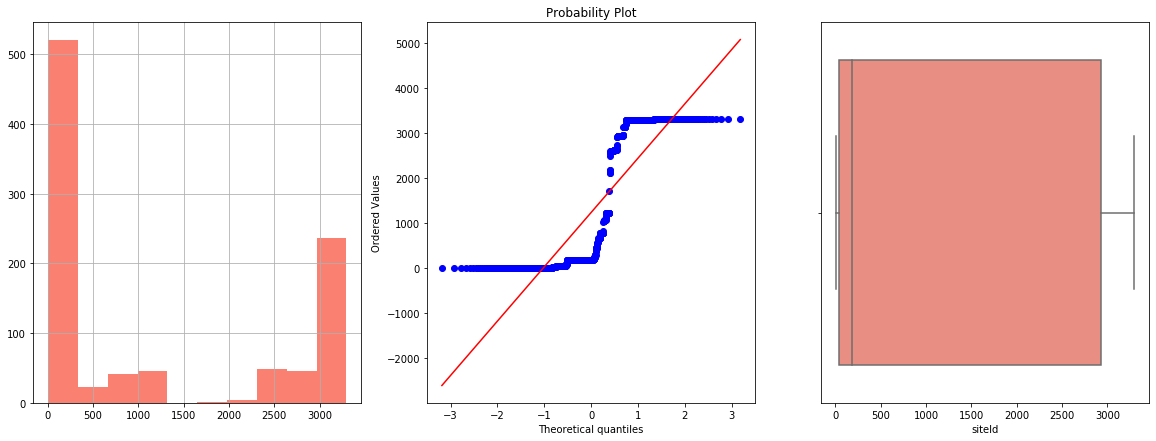

 Distribution Plots for feature : goalid is shown ↓


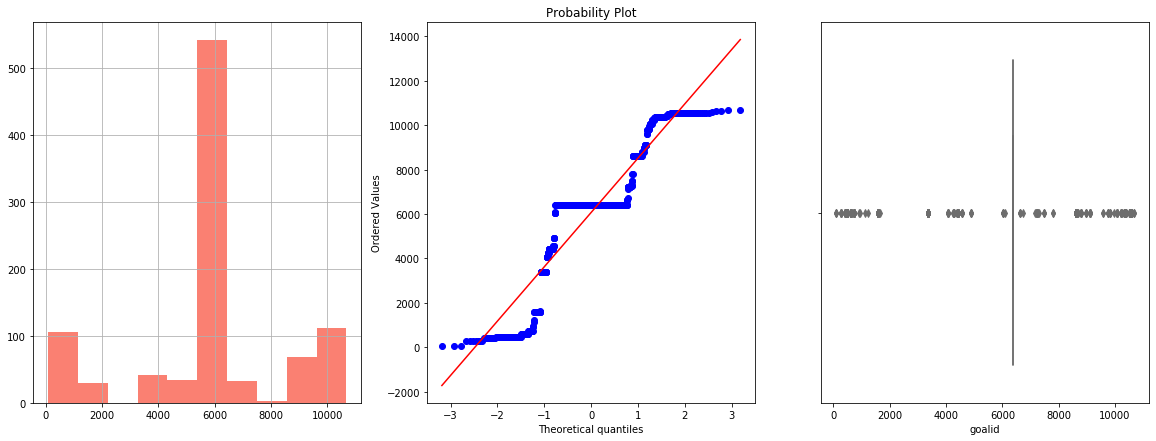

 Distribution Plots for feature : cityId is shown ↓


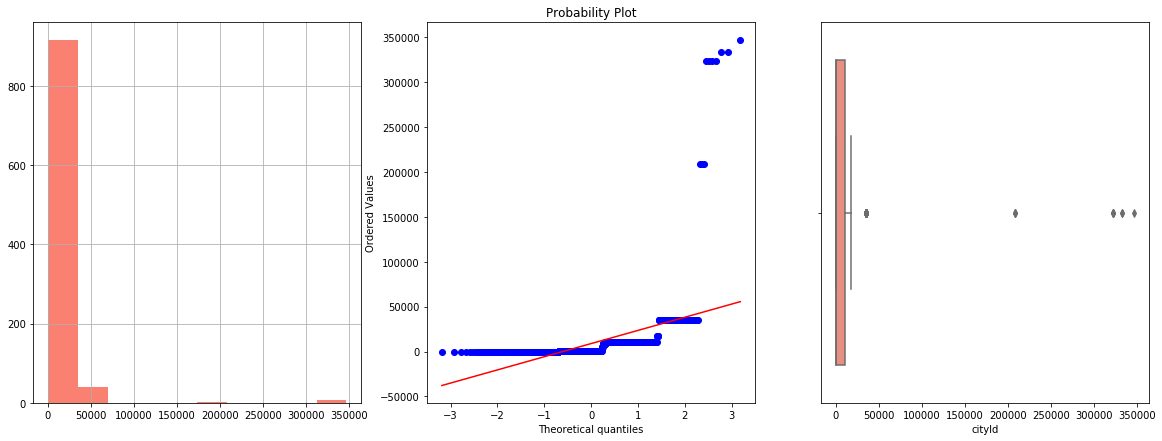

 Distribution Plots for feature : stateId is shown ↓


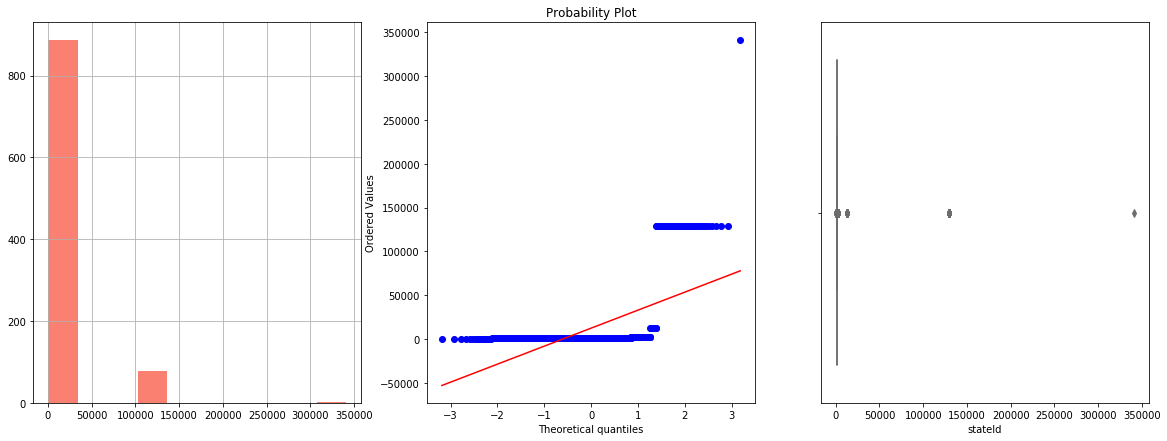

 Distribution Plots for feature : countryDimId is shown ↓


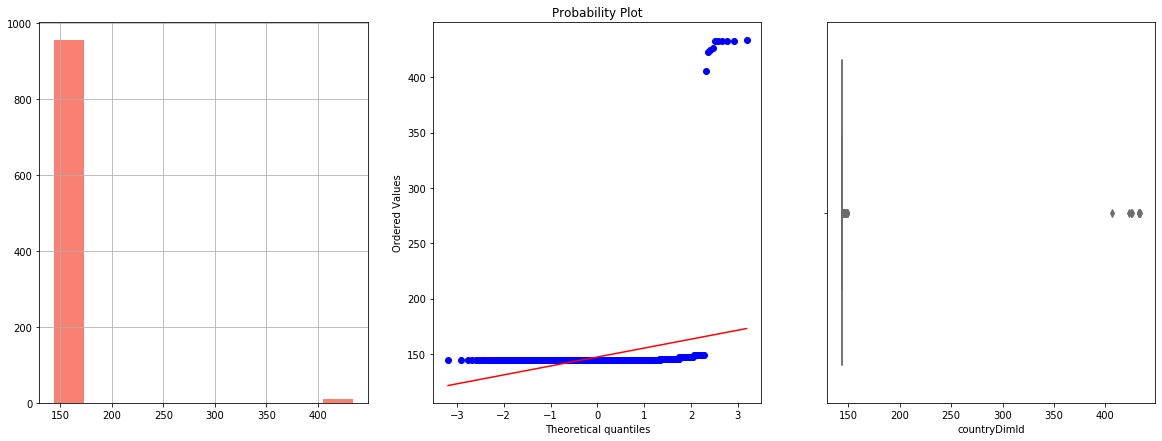

 Distribution Plots for feature : browserId is shown ↓


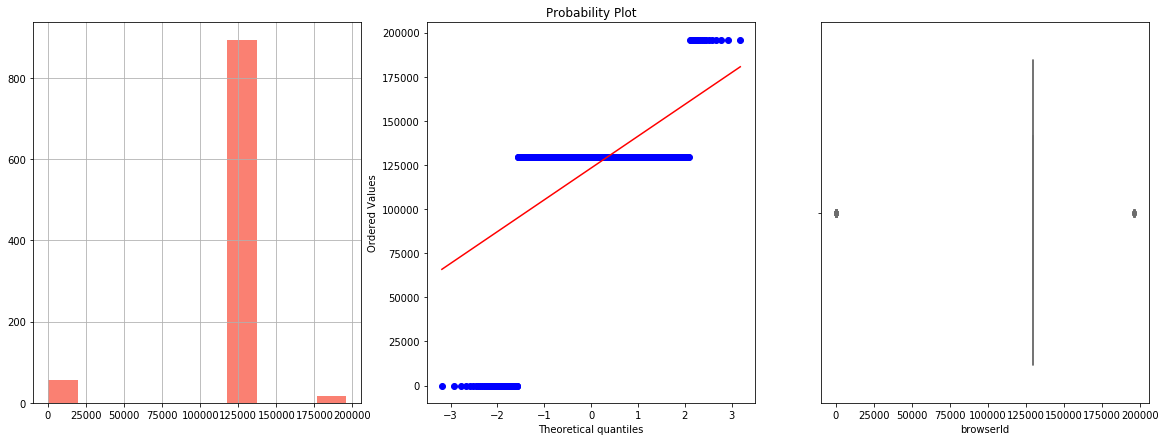

 Distribution Plots for feature : adslotdimid is shown ↓


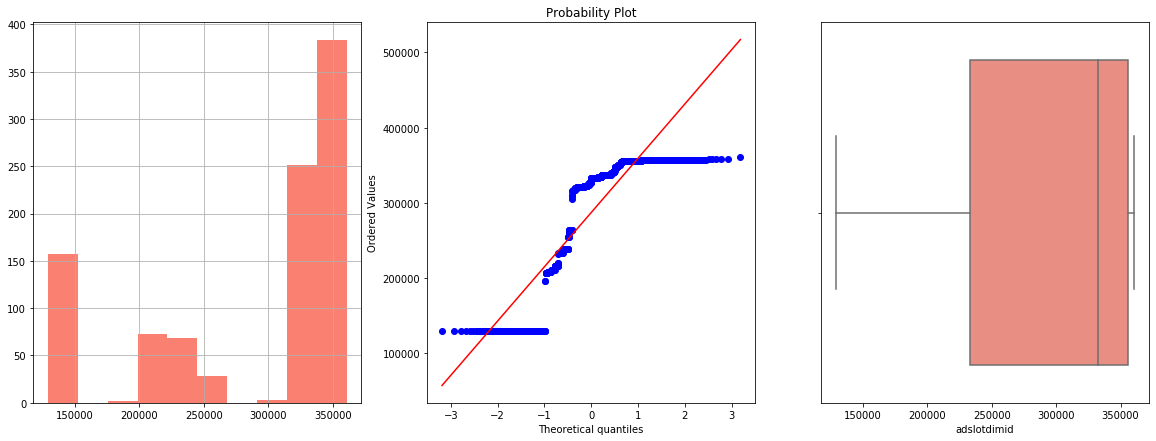

 Distribution Plots for feature : ispDimId is shown ↓


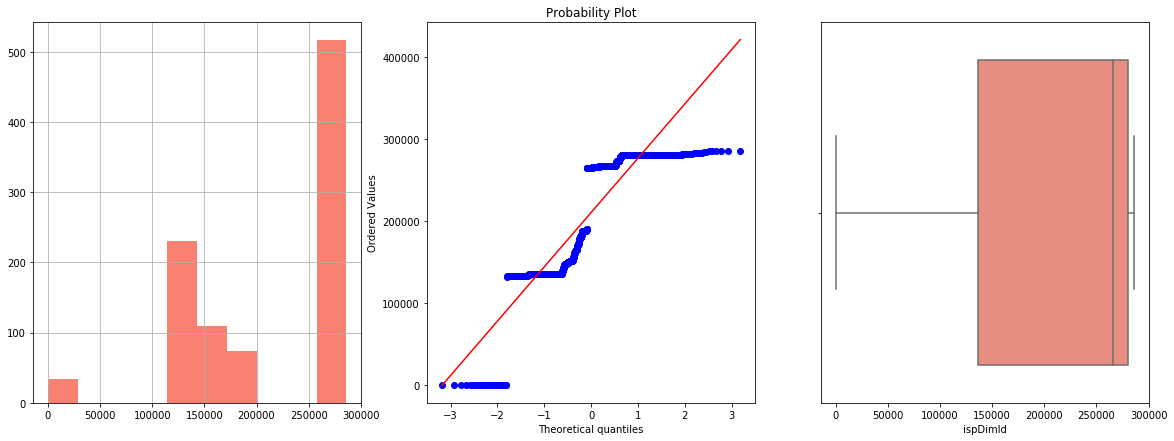

 Distribution Plots for feature : osVerDimId is shown ↓


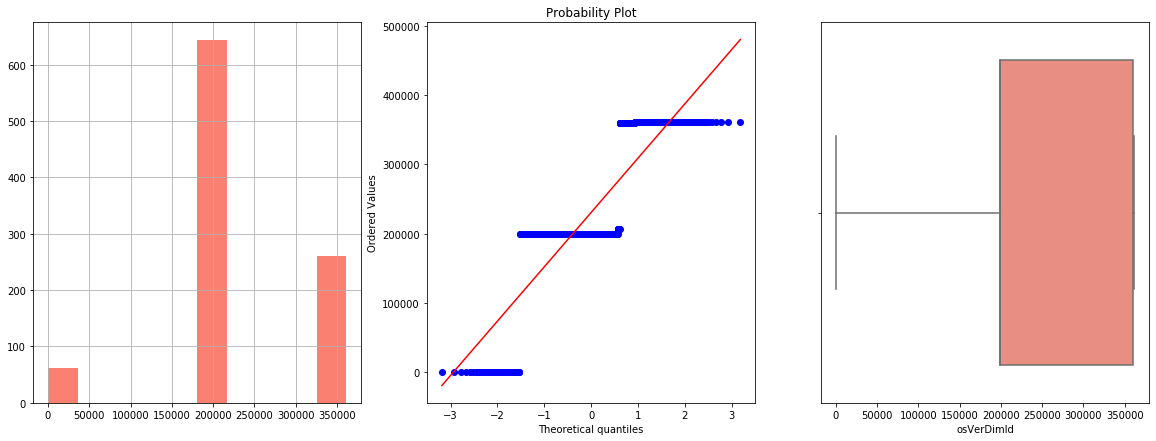

 Distribution Plots for feature : conversion_fraud is shown ↓


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

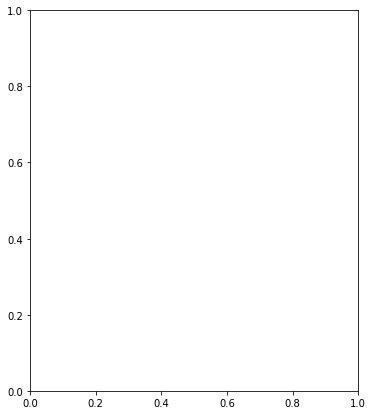

In [41]:
def drawplots(col):
    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)  
    df[col].hist(color = 'salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color = 'salmon')
    
    plt.show()
    
    
for i in numeric_cols:
    print(f' Distribution Plots for feature : {i} is shown ↓')
    drawplots(i)
    print("="*125)
    

In [42]:
df['crtd'].unique(),df['itmClmbLId'].unique()

(array([1.62e+12]),
 array([5618155, 5617956, 5603406, 5614994, 5614309, 5601794, 5612209,
        5604001, 5609888, 5601814, 5612208], dtype=int64))

In [43]:
df['devTypeDimId'].unique()

array([196047., 196041., 129276.,      0.])

In [44]:
map1 = dict(zip(list(df['crtd'].values),map(list(df['crtd'].values).count,list(df['crtd'].values))))
map2 = dict(zip(list(df['itmClmbLId'].values),map(list(df['itmClmbLId'].values).count,list(df['itmClmbLId'].values))))
map3 = dict(zip(list(df['devTypeDimId'].values),map(list(df['devTypeDimId'].values).count,list(df['devTypeDimId'].values))))

df['crtd'] = df['crtd'].map(map1)
df['itmClmbLId'] = df['itmClmbLId'].map(map2)
df['devTypeDimId'] = df['devTypeDimId'].map(map3)
df.head()

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,965,181,285
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,965,181,285
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,965,181,285


In [45]:
touse = df.to_csv('finaluse.csv')